<h3>Importo las librerías a utilizar</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2

<h3>Ingesto los datos en las variables df_test y df_train, esta última será la que utilizaremos a lo largo de la mayor parte del notebook para realizar el EDA y definir el modelo a utilizar.</h3>

In [2]:
df_test = pd.read_csv('datasets\\hospitalizaciones_test.csv', delimiter=',', encoding="utf-8")
df_train = pd.read_csv('datasets\\hospitalizaciones_train.csv', delimiter=',', encoding="utf-8")

In [3]:
#Imprimo una info general de mi dataset para revisar el Dtype de las columnas y verificar que no hayan valores nulos.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410000 entries, 0 to 409999
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  410000 non-null  int64  
 1   Department                         410000 non-null  object 
 2   Ward_Facility_Code                 410000 non-null  object 
 3   doctor_name                        410000 non-null  object 
 4   staff_available                    410000 non-null  int64  
 5   patientid                          410000 non-null  int64  
 6   Age                                410000 non-null  object 
 7   gender                             410000 non-null  object 
 8   Type of Admission                  410000 non-null  object 
 9   Severity of Illness                410000 non-null  object 
 10  health_conditions                  410000 non-null  object 
 11  Visitors with Patient              4100

In [4]:
#Imprimo un encabezado del dataset para examinar a simple vista mis datos.
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [5]:
#Eliminio las columnas que considero que son irrelevantes a la hora de definir si la estadía del paciente va a ser larga o no.
df_train = df_train.drop(columns=['patientid','Visitors with Patient'])
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,41-50,Female,Trauma,Extreme,Diabetes,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,31-40,Female,Trauma,Minor,Heart disease,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,21-30,Female,Trauma,Extreme,Diabetes,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,31-40,Female,Urgent,Moderate,None,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,71-80,Male,Trauma,Moderate,Diabetes,No,5169.269637,34


In [6]:
#Creo una columna binaria 'long_stay' que toma el valor 1 si el paciente estuvo más de 8 días en el hospital, de no ser así, toma el valor 0.
df_train["long_stay"] = np.where(df_train["Stay (in days)"]>8,1,0)

In [7]:
#Utilizo label encoder para convertir mis variables categóricas en enteros para que mi modelo pueda trabajar con ellas.
le = preprocessing.LabelEncoder()

le.fit(df_train.Department)
df_train.Department = le.transform(df_train.Department)

le.fit(df_train.Ward_Facility_Code)
df_train.Ward_Facility_Code = le.transform(df_train.Ward_Facility_Code)

le.fit(df_train.doctor_name)
df_train.doctor_name = le.transform(df_train.doctor_name)

le.fit(df_train.Age)
df_train.Age = le.transform(df_train.Age)

le.fit(df_train.gender)
df_train.gender = le.transform(df_train.gender)

le.fit(df_train['Type of Admission'])
df_train['Type of Admission'] = le.transform(df_train['Type of Admission'])

le.fit(df_train['Severity of Illness'])
df_train['Severity of Illness'] = le.transform(df_train['Severity of Illness'])

le.fit(df_train.health_conditions)
df_train.health_conditions = le.transform(df_train.health_conditions)

le.fit(df_train.Insurance)
df_train.Insurance = le.transform(df_train.Insurance)


In [8]:
#Veo como quedó mi dataframe luego de realizar los label encoder.
df_train.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,Age,gender,Type of Admission,Severity of Illness,health_conditions,Insurance,Admission_Deposit,Stay (in days),long_stay
0,4,2,3,8,0,4,0,1,0,1,1,2966.408696,8,0
1,4,2,1,8,2,3,0,1,1,2,0,3554.835677,9,1
2,2,2,1,8,8,2,0,1,0,1,1,5624.733654,7,0
3,4,2,3,4,7,3,0,2,2,4,0,4814.149231,8,0
4,2,1,4,2,10,7,1,1,2,1,0,5169.269637,34,1


<h3>Inicio de la creación del modelo, pruebas antes de definir los hiperparámetros óptimos.</h3>

In [9]:
#Defino X e y utilizando todo mi dataframe primero, para luego hacer una selección de features utilizando Chi cuadrado.
X = df_train.iloc[:,0:12] #Todo mi dataframe excepto 'Stay (in days)' y 'long_stay'
y = df_train.iloc[:,-1] #Únicamente 'long_stay'

In [10]:
#Hago un split de mis datos, instancio el modelo a utilizar y luego lo entreno. (ahora decidí optar por el árbol de decisión por fines prácticos pero luego realizaré una comparación entre este modelo y uno de Regresión Logística para ver cuál predice mejor).

#Utilizo el test_size y el random_state que se encuentran en la documentación de scikit learn. Este random_state será el mismo de ahora en adelante
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Elijo una profundidad de 5 a modo de test, luego definiremos cuál es la profundidad óptima utilizando estadísticos.
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

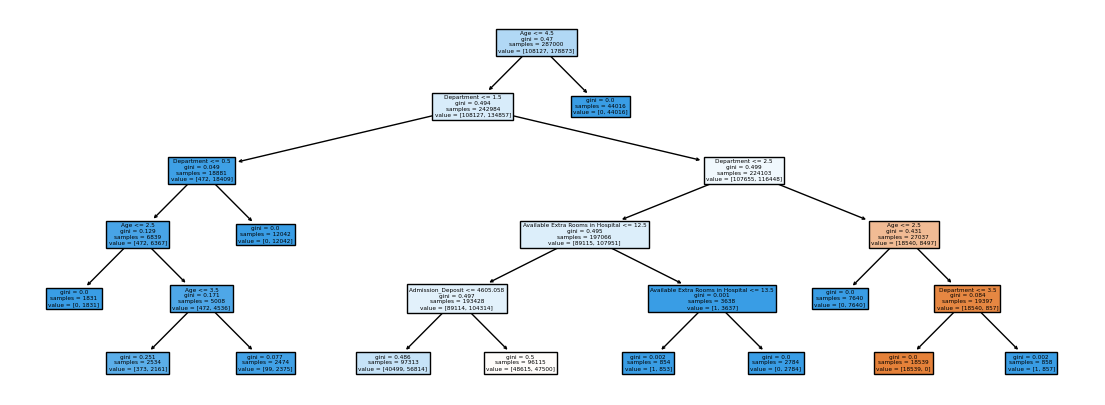

In [11]:
plt.figure(figsize=(14,5))
plot_tree(decision_tree=model, feature_names=X_train.columns, filled=True);

In [12]:
#Defino mi 'y_train_pred' que es la predicción que realiza mi modelo.
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

Accuracy para el árbol: 0.69 (+/- 0.01)
{'fit_time': array([0.70912886, 0.86474586, 0.69726634, 0.75179791, 0.76399827]), 'score_time': array([0.01500106, 0.01699996, 0.01800084, 0.01399684, 0.01899028]), 'test_accuracy': array([0.69018293, 0.69131707, 0.69078049, 0.69323171, 0.69041463])}


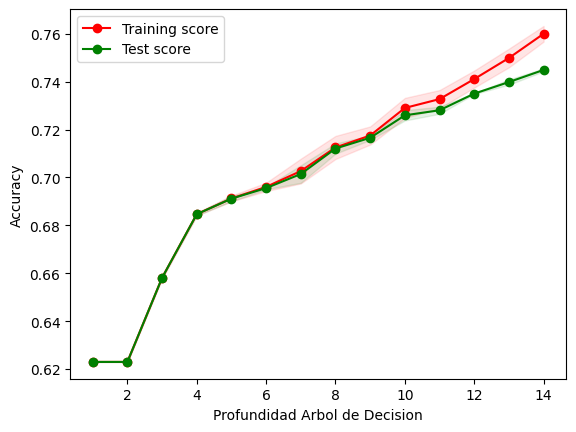

In [13]:
#Realizo una validación cruzada para determinar la profundidad óptima de mi árbol y deducimos que la misma debería ser de 10.

from sklearn.model_selection import cross_val_score
arbol_scores = cross_val_score(model, X, y, cv=10)
print("Accuracy para el árbol: %0.2f (+/- %0.2f)" % (arbol_scores.mean(), arbol_scores.std() * 2))
from sklearn.model_selection import cross_validate
arbol_scores = cross_validate(model, X, y, scoring = ['accuracy'])
print(arbol_scores)
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,15,1)

for profundidad in profundidades:
    clf = DecisionTreeClassifier(max_depth=profundidad)
    tree_scores = cross_validate(clf, X, y, cv=2, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")

plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")


plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

In [14]:
model = DecisionTreeClassifier(random_state=42, max_depth=11) #Utilizo la profundidad óptima calculada con la Cross Validation.
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 0, 0, ..., 0, 1, 1])

In [15]:
#Calculamos el Recall y el Accuracy de nuestro modelo, 
recall_test = recall_score(y, y_train_pred)
print(f'Recall antes de features óptimas: {recall_test}')
accuracy_test = accuracy_score(y, y_train_pred)
print(f'Accuracy antes de features óptimas: {accuracy_test}')

Recall antes de features óptimas: 0.8130187615497855
Accuracy antes de features óptimas: 0.7363536585365854


<h3>Utilizo Chi² para la selección de features.</h3>
<h4>Aclaración: Decidí utilizar Chi² porque considero que no sería correcto usar la Correlación de Pearson al tratarse de variables categóricas, sin embargo, la limitación de Chi² es que para valores muy pequeños puede traernos errores o valores anómalos en nuestras conclusiones.</h4>

In [16]:
f_score = chi2(X_train, y_train)
f_score

(array([1.67043623e+03, 2.04629953e+03, 1.59785609e+03, 8.36015030e+03,
        8.73632541e+00, 1.29007445e+04, 1.04664519e+04, 2.55403367e+00,
        3.84614306e+01, 1.00651245e+00, 2.70193683e-01, 1.98512045e+04]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        3.11932493e-03, 0.00000000e+00, 0.00000000e+00, 1.10013062e-01,
        5.58465259e-10, 3.15739801e-01, 6.03201877e-01, 0.00000000e+00]))

In [17]:
#Para los pvalues mayores a 0,05 decimos que la feature no se encuentra relacionada con nuestro objetivo, por lo que en nuestro caso 'Insurance', 'health_conditions' y 'Type of Admission' no serán utilizadas.
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=False)

Insurance                            6.032019e-01
health_conditions                    3.157398e-01
Type of Admission                    1.100131e-01
staff_available                      3.119325e-03
Severity of Illness                  5.584653e-10
Available Extra Rooms in Hospital    0.000000e+00
Department                           0.000000e+00
Ward_Facility_Code                   0.000000e+00
doctor_name                          0.000000e+00
Age                                  0.000000e+00
gender                               0.000000e+00
Admission_Deposit                    0.000000e+00
dtype: float64

In [18]:
#Vuelvo a aplicar mi modelo, ahora con los hiperparámetros calculados anteriormente.
X = df_train[['staff_available','Severity of Illness','Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Admission_Deposit']]
y = df_train.long_stay
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = DecisionTreeClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)
y_train_pred = model.predict(X)
y_train_pred

array([1, 1, 0, ..., 1, 1, 1])

In [19]:
#Calculamos nuevamente el Recall y el Accuracy del modelo, ahora con los hiperparámetros ajustados y notamos un buen aumento del Recall a costa de perder una cantidad despreciable de Accuracy.
recall = recall_score(y, y_train_pred)
print(f'Recall: {recall}. Varió en {recall-recall_test} con respecto al anterior')
accuracy = accuracy_score(y, y_train_pred)
print(f'Accuracy: {accuracy}. Varió en {accuracy-accuracy_test} con respecto al anterior')

Recall: 0.8503539324083065. Varió en 0.037335170858521005 con respecto al anterior
Accuracy: 0.7278. Varió en -0.008553658536585407 con respecto al anterior


<h3>Comparación de Accuracy entre Árbol de decisión y Regresión Logística.</h3>

In [24]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', tree.DecisionTreeClassifier(random_state=42))])

In [25]:
pipelines = [pipe_lr, pipe_dt]
pipe_dict = {0: 'Regresión Logística', 1: 'Árbol de decisión'}

In [26]:
pipe_lr.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train);

In [27]:
for idx, val in enumerate(pipelines):
	print('%s pipeline accuracy en test: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

Regresión Logística pipeline accuracy en test: 0.601
Árbol de decisión pipeline accuracy en test: 0.664


In [28]:
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipelines):
	if val.score(X_train, y_train) > best_acc:
		best_acc = val.score(X_train, y_train)
		best_pipe = val
		best_clf = idx
print('Modelo con el mejor accuracy: %s' % pipe_dict[best_clf])

Modelo con el mejor accuracy: Árbol de decisión


<h3>Creación del Pipeline.</h3>

In [29]:
import joblib

joblib.dump(model, 'DecisionTree_model.pkl', compress=1)

['DecisionTree_model.pkl']

In [30]:
DecisionTree_model = joblib.load('DecisionTree_model.pkl')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
DecisionTree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [32]:
DecisionTree_model.score(X_test, y_test)

0.7252032520325203

<h3>Aplicando las modificaciones y el modelo a nuestro dataset "hospitalizaciones_test.csv"</h3>

In [42]:
df_test = pd.read_csv('datasets\\hospitalizaciones_test.csv', delimiter=',', encoding="utf-8")
df_test = df_test.drop(columns=['patientid','Visitors with Patient'])
le = preprocessing.LabelEncoder()
le.fit(df_test.Department)
df_test.Department = le.transform(df_test.Department)
le.fit(df_test.Ward_Facility_Code)
df_test.Ward_Facility_Code = le.transform(df_test.Ward_Facility_Code)
le.fit(df_test.doctor_name)
df_test.doctor_name = le.transform(df_test.doctor_name)
le.fit(df_test.Age)
df_test.Age = le.transform(df_test.Age)
le.fit(df_test.gender)
df_test.gender = le.transform(df_test.gender)
le.fit(df_test['Type of Admission'])
df_test['Type of Admission'] = le.transform(df_test['Type of Admission'])
le.fit(df_test['Severity of Illness'])
df_test['Severity of Illness'] = le.transform(df_test['Severity of Illness'])
le.fit(df_test.health_conditions)
df_test.health_conditions = le.transform(df_test.health_conditions)
le.fit(df_test.Insurance)
df_test.Insurance = le.transform(df_test.Insurance)
DecisionTree_model = joblib.load('DecisionTree_model.pkl')
X_test = df_test[['staff_available','Severity of Illness','Available Extra Rooms in Hospital','Department','Ward_Facility_Code','doctor_name','Age','gender','Admission_Deposit']]
pred = DecisionTree_model.predict(X_test)
df_test['pred'] = pred
df_test = df_test['pred']
df_test.to_csv('Emmafer.csv', index=False)